# SEEJ work project for Scott Wolk

### Project:
Find a list of targets in the TESS Survey that are candidate super-Neptunes / Jupiters in close orbits.
That also have a detection in the ROSAT All Sky Survey (RASS)..
That's all! :D


### Notes:

#### TESS:
Webpage for the TESS TCEs (Threshold Crossing Events) files for Sectors 1 & 2:
http://archive.stsci.edu/tess/bulk_downloads/bulk_downloads_tce.html

/Users/elwin/WORK/SEEJwork/tess_tce_sector[1,2].txt

These files give the information on (suspected) planet, giving Orbital Period and Planet Radius (in R_earth)

Find candidates that look like they have a Hot Jupiter or Neptune (or Earth; create 3 catalogs) 

Then need to feed this back into the online catalogs to find out the [RA,Dec] etc. of the host star. 

With this list we can compare to the RASS catalog and find out which ones have an X-ray detection...

#### The Preamble...

In [1]:
% matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import astropy 

import astropy.io.ascii as ascii
from astropy.io import fits
from astropy import units 
from astropy.coordinates import SkyCoord

import pickle

from astropy.table import Table

from astroquery.mast import Catalogs

#### Read in the two Sector TCE catalogs...

In [3]:
tce_sec1 = ascii.read('tess_tce_sector1.txt')
tce_sec2 = ascii.read('tess_tce_sector2.txt')

In [4]:
tic_id1, tic_id2 = tce_sec1['ticid'], tce_sec2['ticid'] 

#### Find the positional data for the TCE objects from the TIC catalog...

In [5]:
tce1_catdata = Catalogs.query_criteria(catalog='Tic', objID=tic_id1)
tce2_catdata = Catalogs.query_criteria(catalog='Tic', objID=tic_id2)

In [6]:
# Coordinates are not readable by SkyCoord so reformat the input string

readable_coords1 = []
for coord in tce1_catdata['TWOMASS']:
    read_coord = coord[0:2] + ' ' + coord[2:4] + ' ' + coord[4:6] + '.' + coord[6:8] + ' ' + coord[8:11] + ' ' + coord[11:13] + ' ' + coord[13:15] + '.' + coord[15:] 
    readable_coords1.append(read_coord)

In [7]:
readable_coords2 = []
for coord in tce2_catdata['TWOMASS']:
    read_coord = coord[0:2] + ' ' + coord[2:4] + ' ' + coord[4:6] + '.' + coord[6:8] + ' ' + coord[8:11] + ' ' + coord[11:13] + ' ' + coord[13:15] + '.' + coord[15:] 
    readable_coords2.append(read_coord)

In [8]:
cat_tce1 = SkyCoord(readable_coords1, unit=(units.hourangle, units.degree), frame='icrs')
cat_tce2 = SkyCoord(readable_coords2, unit=(units.hourangle, units.degree), frame='icrs')

##### Lists are different lengths!  Check for duplicates (multiple planets per star) and see if numbers match: yup!

In [9]:
len(tce_sec1),len(tce_sec2),len(tic_id1),len(tic_id2),len(tce1_catdata),len(tce2_catdata),len(cat_tce1),len(cat_tce2)

(1558, 1348, 1558, 1348, 1031, 906, 1031, 906)

In [10]:
len(list(set(tic_id1))), len(list(set(tic_id2))) 

(1031, 906)

#### Write out the TCE catalogs to file for comparison with the Chandra and XMM-Newton online archives...

In [98]:
tab1 = Table([cat_tce1.ra, cat_tce1.dec], names=('RA', 'Dec') )   
tab2 = Table([cat_tce2.ra, cat_tce2.dec], names=('RA', 'Dec') )   

In [100]:
ascii.write(tab1, 'cat_tce1_coords.dat', format='csv')
ascii.write(tab2, 'cat_tce2_coords.dat', format='csv')

#### Make some plots of the data to examine Planet Radius and Orbital Period/AU distributions

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.]),
 <a list of 9 Text yticklabel objects>)

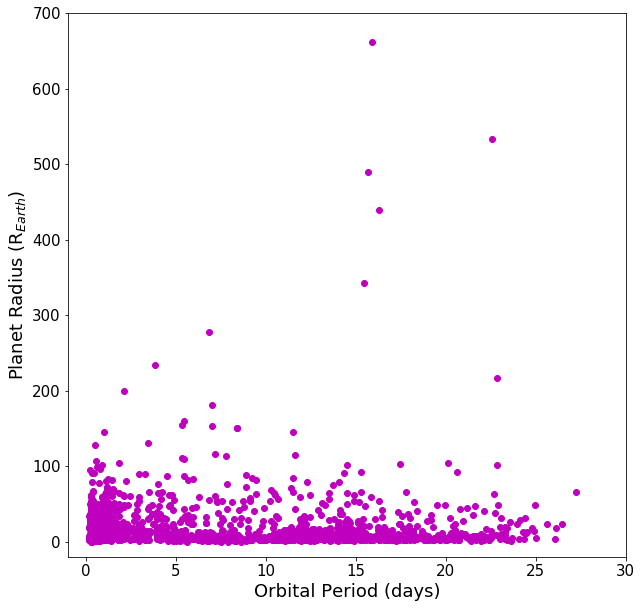

In [11]:
fig = plt.figure(figsize=(10,10))

plt.plot( tce_sec1['orbitalPeriodDasys'], tce_sec1['planetRadiusEarthRadii'], 'om' )

plt.xlabel('Orbital Period (days)', fontsize=18)
plt.ylabel('Planet Radius (R$_{Earth}$)', fontsize=18)

plt.xlim(-1,30)
plt.ylim(-20, 700)
plt.xticks(size=15)
plt.yticks(size=15)



(array([  1.00000000e-04,   1.00000000e-03,   1.00000000e-02,
          1.00000000e-01,   1.00000000e+00,   1.00000000e+01,
          1.00000000e+02,   1.00000000e+03,   1.00000000e+04,
          1.00000000e+05]), <a list of 10 Text yticklabel objects>)

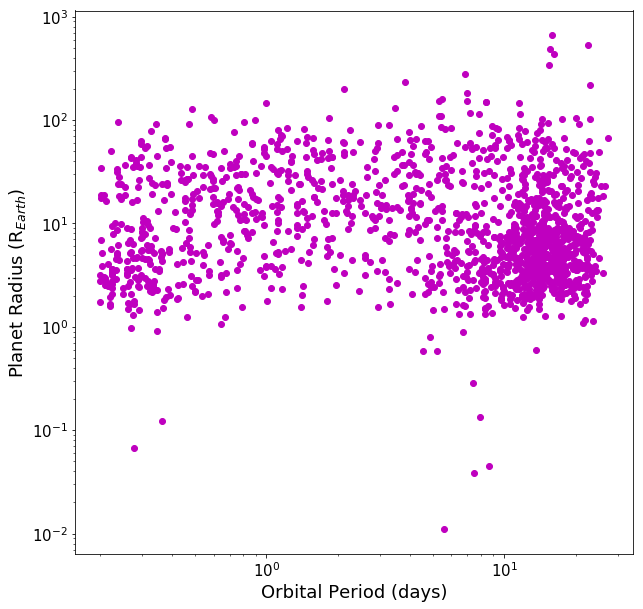

In [6]:
fig = plt.figure(figsize=(10,10))

plt.plot( tce_sec1['orbitalPeriodDasys'], tce_sec1['planetRadiusEarthRadii'], 'om' )

plt.xlabel('Orbital Period (days)', fontsize=18)
plt.ylabel('Planet Radius (R$_{Earth}$)', fontsize=18)

plt.yscale('log')
plt.xscale('log')
#plt.xlim(0,30)
#plt.ylim(0, 700)
plt.xticks(size=15)
plt.yticks(size=15)




(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.]),
 <a list of 9 Text yticklabel objects>)

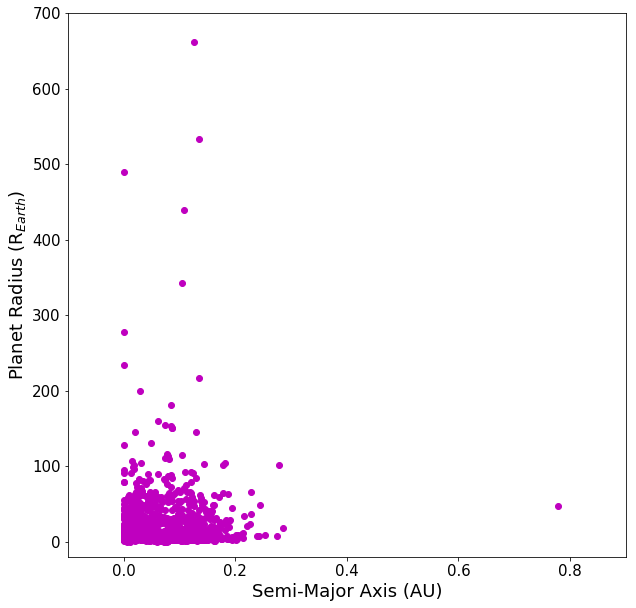

In [7]:
fig = plt.figure(figsize=(10,10))

plt.plot( tce_sec1['semiMajorAxisAu'], tce_sec1['planetRadiusEarthRadii'], 'om' )

plt.xlabel('Semi-Major Axis (AU)', fontsize=18)
plt.ylabel('Planet Radius (R$_{Earth}$)', fontsize=18)

plt.xlim(-0.1,0.9)
plt.ylim(-20, 700)
plt.xticks(size=15)
plt.yticks(size=15)




(array([  1.00000000e-04,   1.00000000e-03,   1.00000000e-02,
          1.00000000e-01,   1.00000000e+00,   1.00000000e+01,
          1.00000000e+02,   1.00000000e+03,   1.00000000e+04,
          1.00000000e+05]), <a list of 10 Text yticklabel objects>)

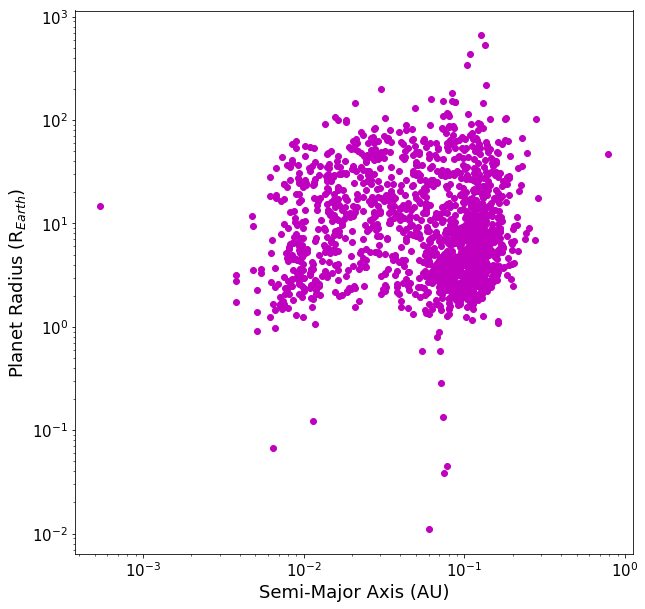

In [8]:
fig = plt.figure(figsize=(10,10))

plt.plot( tce_sec1['semiMajorAxisAu'], tce_sec1['planetRadiusEarthRadii'], 'om' )

plt.xlabel('Semi-Major Axis (AU)', fontsize=18)
plt.ylabel('Planet Radius (R$_{Earth}$)', fontsize=18)

plt.yscale('log')
plt.xscale('log')
#plt.xlim(-0.1,0.9)
#plt.ylim(-20, 700)
plt.xticks(size=15)
plt.yticks(size=15)




#### What constitutes a Hot Neptune plus sized planet?  
What is the minimum planetary radius/mass versus orbital period?

So Rneptune = 3.9 Rearth,  Rjupiter = 11.2 Rearth
Hot Jupiter orbital period ~< 10 days
Proposal says average ~ 3.5 days

So select for anything with orbital period less than ten days/ 0.1 AU? and radius greater than 4 Rearth?

Let's just match to RASS first and figure out what's what later on...


#### Read in the RASS Public Archive file to determine what matches there are

In [15]:
# Clean up the file - it's got a carriage return on the day field that's creating extra lines...

#from itertools import islice

#with open('rosarchive_final.pos') as fin, open('rosarchive_final_fix_carriage_return.pos', 'w') as fout:
#    fout.writelines(islice(fin, None, None, 2))

In [12]:
rass_archive = ascii.read('rosarchive_final_fix_carriage_return.pos', format='fixed_width', delimiter=' ')

In [13]:
len(rass_archive)

12833

In [14]:
rra, rde = rass_archive['RA(2000)'], rass_archive['DEC(2000)']

In [15]:
cat_rass = SkyCoord(rra, rde, unit=(units.hourangle, units.degree), frame='icrs')

(array([-100.,  -75.,  -50.,  -25.,    0.,   25.,   50.,   75.,  100.]),
 <a list of 9 Text yticklabel objects>)

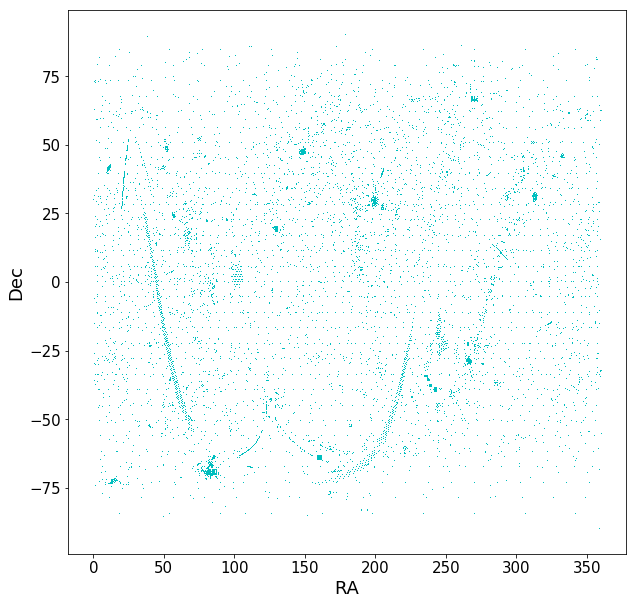

In [16]:
# Plot the spatial distribution on sky of the the full RASS catalog

fig = plt.figure(figsize=(10,10))

plt.plot(cat_rass.ra, cat_rass.dec, ',c')

plt.xlabel('RA', fontsize=18)
plt.ylabel('Dec', fontsize=18)

#plt.xlim(-0.1,0.9)
#plt.ylim(-20, 700)
plt.xticks(size=15)
plt.yticks(size=15)


#### Match the two TCE catalogs to the RASS catalog...

In [17]:
id1r, d21r, d31r  = cat_tce1.match_to_catalog_sky(cat_rass)
id2r, d22r, d32r  = cat_tce1.match_to_catalog_sky(cat_rass)

In [18]:
w1r = np.where(d21r.arcsec <= 600.0)[0]
w2r = np.where(d22r.arcsec <= 600.0)[0]

In [19]:
len(w1r), len(w2r)

(14, 14)

(array([ -25.,    0.,   25.,   50.,   75.,  100.,  125.,  150.,  175.,
         200.,  225.]), <a list of 11 Text yticklabel objects>)

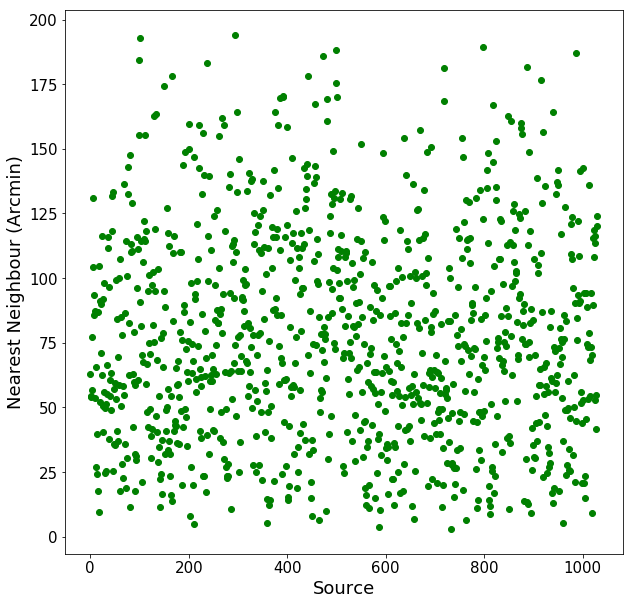

In [20]:
fig = plt.figure(figsize=(10,10))

plt.plot(d21r.arcmin, 'og')

plt.xlabel('Source', fontsize=18)
plt.ylabel('Nearest Neighbour (Arcmin)', fontsize=18)

#plt.xlim(-0.1,0.9)
#plt.ylim(-20, 700)
plt.xticks(size=15)
plt.yticks(size=15)



(array([   0.,  100.,  200.,  300.,  400.,  500.,  600.]),
 <a list of 7 Text yticklabel objects>)

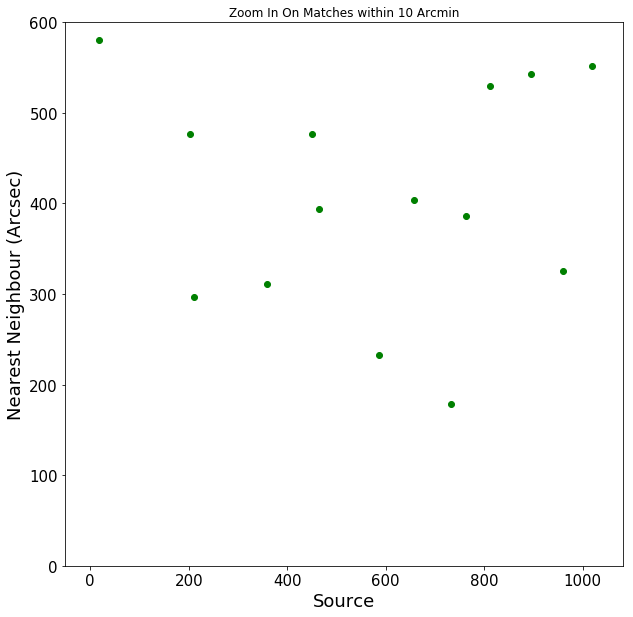

In [21]:
fig = plt.figure(figsize=(10,10))

plt.plot(d21r.arcsec, 'og')

plt.xlabel('Source', fontsize=18)
plt.ylabel('Nearest Neighbour (Arcsec)', fontsize=18)

plt.title('Zoom In On Matches within 10 Arcmin')
#plt.xlim(-0.1,0.9)
plt.ylim(0, 600)
plt.xticks(size=15)
plt.yticks(size=15)


#### Compare the Catalogs to themselves (& themselves with offsets) to test whether matching routine is working properly

In [22]:
id11, d211, d311  = cat_tce1.match_to_catalog_sky(cat_tce1)
idrr, d2rr, d3rr  = cat_rass.match_to_catalog_sky(cat_rass)

In [26]:
w11 = np.where(d211.arcsec <= 1.0)[0]
wrr = np.where(d2rr.arcsec <= 1.0)[0]

In [30]:
# How many sources match to the catalogs with themselves? All of them: passed. 

len(w11), len(cat_tce1), len(wrr), len(cat_rass)

(1031, 1031, 12833, 12833)

In [45]:
cat_tce1.ra.deg

array([  19.96104167,   60.33495833,   61.35883333, ...,  187.452125  ,
        196.58666667,  196.56      ])

In [36]:
# Create arrays of offsets in ra and dec for the catalog - in range up to 60 arcsec

dr1 = np.random.random(len(cat_tce1)) * 60
dd1 = np.random.random(len(cat_tce1)) * 60 

In [39]:
new_ra = cat_tce1.ra.arcsec + dr1
new_de = cat_tce1.dec.arcsec + dd1

In [42]:
cat_newtce1 = SkyCoord(new_ra, new_de, unit=(units.arcsec, units.arcsec), frame='icrs')

In [47]:
# Match the new catalog with radom offsets to the orignal catalog

id1n, d21n, d31n  = cat_tce1.match_to_catalog_sky(cat_newtce1)

In [50]:
r = np.sqrt(60**2 + 60**2)  ## r = 84.8528 this is the new search radius

In [52]:
w1n = np.where(d21n.arcsec <= 85.0)[0]

In [53]:
len(w1n), len(cat_newtce1)  ## Matches fine... 

(1031, 1031)

#### There is no evidene 